In [13]:
print("Name: Hitesh Pal Soodan")
print("Roll no.: TACO22132")

Name: Hitesh Pal Soodan
Roll no.: TACO22132


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("Extended_Employee_Performance_and_Productivity_Data.csv") #https://www.kaggle.com/datasets/mexwell/employee-performance-and-productivity-data
df

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,False
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,Finance,Male,27,Technician,2022-12-07 08:03:05.556036,1,Bachelor,4,4900.0,55,46,5,3,75,16,48,2,1.28,False
99996,99997,IT,Female,36,Consultant,2018-07-24 08:03:05.556036,6,Master,5,8250.0,39,35,7,0,0,10,77,1,3.48,True
99997,99998,Operations,Male,53,Analyst,2015-11-24 08:03:05.556036,8,High School,2,4800.0,31,13,6,5,0,5,87,1,2.60,False
99998,99999,HR,Female,22,Consultant,2015-08-03 08:03:05.556036,9,High School,5,8250.0,35,43,10,1,75,2,31,1,3.10,False


In [15]:
df.drop(["Department", "Gender", 
"Job_Title","Hire_Date","Resigned"],axis=1, inplace=True)
df

,Employee_ID,Age,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score
0,1,55,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63
1,2,29,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72
2,3,55,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17
3,4,48,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86
4,5,36,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,27,1,Bachelor,4,4900.0,55,46,5,3,75,16,48,2,1.28
99996,99997,36,6,Master,5,8250.0,39,35,7,0,0,10,77,1,3.48
99997,99998,53,8,High School,2,4800.0,31,13,6,5,0,5,87,1,2.60
99998,99999,22,9,High School,5,8250.0,35,43,10,1,75,2,31,1,3.10


In [16]:
df["Education_Level"].unique()


array(['High School', 'Bachelor', 'Master', 'PhD'], dtype=object)

In [17]:
le = LabelEncoder()
df['Education_Level'] = le.fit_transform(df['Education_Level'])
df

,Employee_ID,Age,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score
0,1,55,2,1,5,6750.0,33,32,22,2,0,14,66,0,2.63
1,2,29,0,1,5,7500.0,34,34,13,14,100,12,61,2,1.72
2,3,55,8,1,3,5850.0,37,27,6,3,50,10,1,0,3.17
3,4,48,7,0,2,4800.0,52,10,28,12,100,10,0,1,1.86
4,5,36,3,0,2,4800.0,38,11,29,13,100,15,9,1,1.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,27,1,0,4,4900.0,55,46,5,3,75,16,48,2,1.28
99996,99997,36,6,2,5,8250.0,39,35,7,0,0,10,77,1,3.48
99997,99998,53,8,1,2,4800.0,31,13,6,5,0,5,87,1,2.60
99998,99999,22,9,1,5,8250.0,35,43,10,1,75,2,31,1,3.10


In [18]:
df['High_Performer'] = (df['Performance_Score'] >= 4).astype(int)
df

,Employee_ID,Age,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,High_Performer
0,1,55,2,1,5,6750.0,33,32,22,2,0,14,66,0,2.63,1
1,2,29,0,1,5,7500.0,34,34,13,14,100,12,61,2,1.72,1
2,3,55,8,1,3,5850.0,37,27,6,3,50,10,1,0,3.17,0
3,4,48,7,0,2,4800.0,52,10,28,12,100,10,0,1,1.86,0
4,5,36,3,0,2,4800.0,38,11,29,13,100,15,9,1,1.25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,27,1,0,4,4900.0,55,46,5,3,75,16,48,2,1.28,1
99996,99997,36,6,2,5,8250.0,39,35,7,0,0,10,77,1,3.48,1
99997,99998,53,8,1,2,4800.0,31,13,6,5,0,5,87,1,2.60,0
99998,99999,22,9,1,5,8250.0,35,43,10,1,75,2,31,1,3.10,1


C:\Users\Administrator\AppData\Local\Temp\ipykernel_22120\3091665500.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='High_Performer', y='Monthly_Salary', data=df,


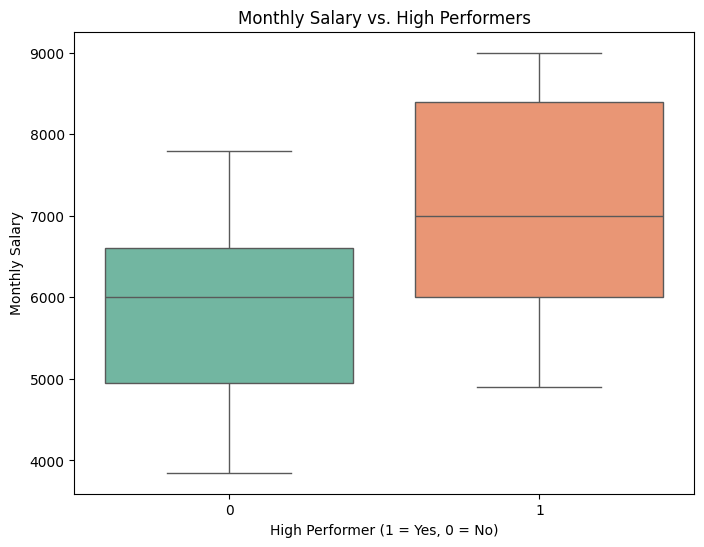

In [20]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='High_Performer', y='Monthly_Salary', data=df, 
palette='Set2')
plt.title("Monthly Salary vs. High Performers")
plt.xlabel("High Performer (1 = Yes, 0 = No)")
plt.ylabel("Monthly Salary")
plt.show()

In [8]:
X = df[['Performance_Score', 'Education_Level', 
'Employee_Satisfaction_Score', 'Promotions']]
Y = df['High_Performer']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
test_size=0.2, random_state=42)
X_test


,Performance_Score,Education_Level,Employee_Satisfaction_Score,Promotions
75721,2,2,4.59,0
80184,4,1,4.83,1
19864,3,1,2.23,0
76699,1,2,4.88,0
92991,4,0,3.68,1
...,...,...,...,...
32595,3,1,1.57,2
29313,4,2,3.88,0
37862,2,2,1.49,0
53421,5,0,1.92,2


In [9]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
LogisticRegression()
y_pred = lr.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))


Confusion Matrix:
 [[12107     0]
 [    0  7893]]


In [10]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy: ",accuracy)

Accuracy:  1.0


In [11]:
prediction = lr.predict([[5, 1, 1.72, 2]])
print(prediction)

[1]


C:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [12]:
prediction = lr.predict([[2, 0, 1.25, 1]])
print(prediction)


[0]


C:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
